In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Loan Data.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.shape

(614, 13)

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<Axes: >

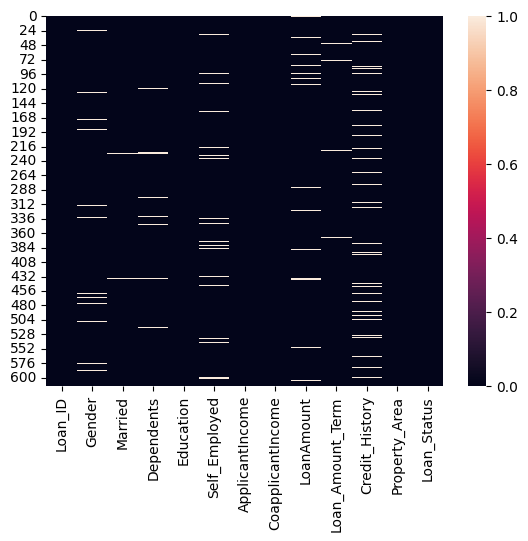

In [6]:
sns.heatmap(df.isnull()) 

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

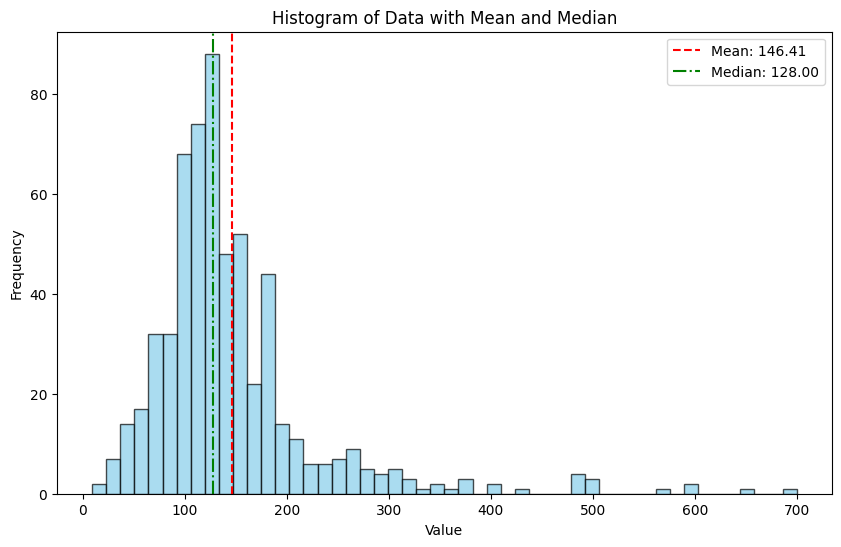

In [9]:


# Step 2: Compute mean and median excluding null values
valid_values = df['LoanAmount'].dropna()  # Assuming your column name is 'value'
mean_value = np.mean(valid_values)
median_value = np.median(valid_values)

# Step 3: Plot the data
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plot histogram of non-null values
plt.hist(valid_values, bins=50, color='skyblue', edgecolor='black', alpha=0.7)

# Plot mean and median lines
plt.axvline(x=mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axvline(x=median_value, color='g', linestyle='-.', label=f'Median: {median_value:.2f}')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data with Mean and Median')

# Add legend
plt.legend()

# Show plot
plt.show()


cheching outliers

<Axes: >

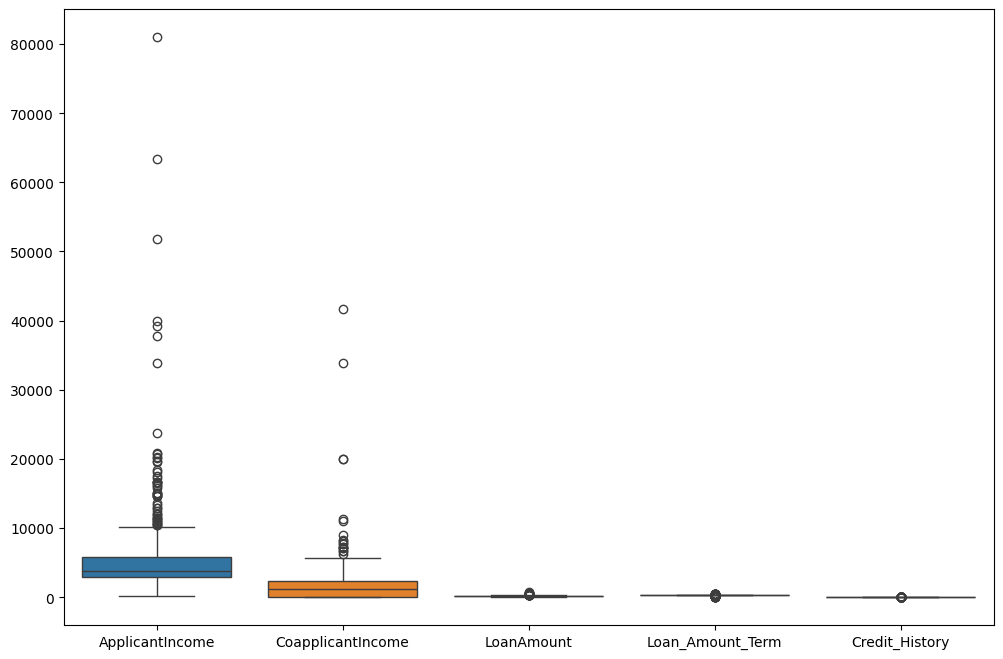

In [10]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df)

In [11]:
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']

In [12]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0


fill the null value

In [13]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [14]:
df['Credit_History'].mean()

0.8421985815602836

In [15]:
df['LoanAmount'].median()

128.0

In [16]:
df['LoanAmount'].mean()

145.75244299674267

In [17]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [18]:
df['Gender'].mode()[0]

'Male'

In [19]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
dtype: int64

<Axes: >

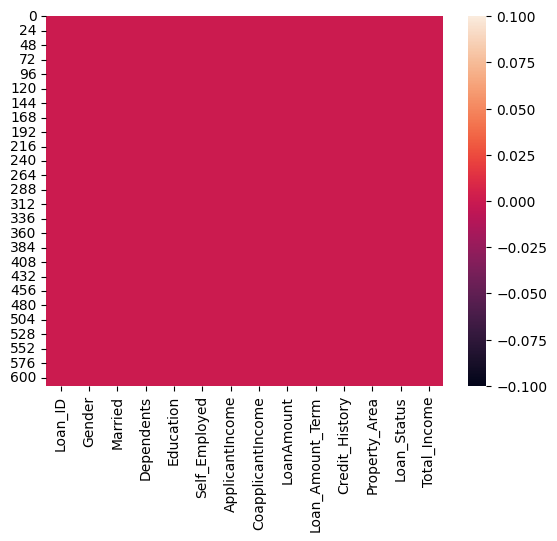

In [20]:
sns.heatmap(df.isnull())

In [21]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0


In [22]:
df['Gender'].value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

In [23]:
cols=['Loan_ID','ApplicantIncome','CoapplicantIncome']
df=df.drop(columns=cols)

In [24]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,128.0,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0


In [25]:
df.dtypes

Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area        object
Loan_Status          object
Total_Income        float64
dtype: object

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
cols=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

In [28]:
le=LabelEncoder()

In [29]:
for col in cols:
    df[col]=le.fit_transform(df[col].astype(str))

In [30]:
df.head(50)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0,0,0,128.0,360.0,1.000000,2,1,5849.0
1,1,1,1,0,0,128.0,360.0,1.000000,0,0,6091.0
2,1,1,0,0,1,66.0,360.0,1.000000,2,1,3000.0
3,1,1,0,1,0,120.0,360.0,1.000000,2,1,4941.0
4,1,0,0,0,0,141.0,360.0,1.000000,2,1,6000.0
5,1,1,2,0,1,267.0,360.0,1.000000,2,1,9613.0
6,1,1,0,1,0,95.0,360.0,1.000000,2,1,3849.0
7,1,1,3,0,0,158.0,360.0,0.000000,1,0,5540.0
8,1,1,2,0,0,168.0,360.0,1.000000,2,1,5532.0
9,1,1,1,0,0,349.0,360.0,1.000000,1,0,23809.0


In [31]:
df.dtypes

Gender                int32
Married               int32
Dependents            int32
Education             int32
Self_Employed         int32
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area         int32
Loan_Status           int32
Total_Income        float64
dtype: object

In [32]:
X=df.drop(columns=['Loan_Status'])

In [33]:
X

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,1,0,0,0,0,128.0,360.0,1.0,2,5849.0
1,1,1,1,0,0,128.0,360.0,1.0,0,6091.0
2,1,1,0,0,1,66.0,360.0,1.0,2,3000.0
3,1,1,0,1,0,120.0,360.0,1.0,2,4941.0
4,1,0,0,0,0,141.0,360.0,1.0,2,6000.0
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,71.0,360.0,1.0,0,2900.0
610,1,1,3,0,0,40.0,180.0,1.0,0,4106.0
611,1,1,1,0,0,253.0,360.0,1.0,2,8312.0
612,1,1,2,0,0,187.0,360.0,1.0,2,7583.0


In [34]:
y=df['Loan_Status']

In [35]:
df['Loan_Status'].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

<Axes: xlabel='Loan_Status'>

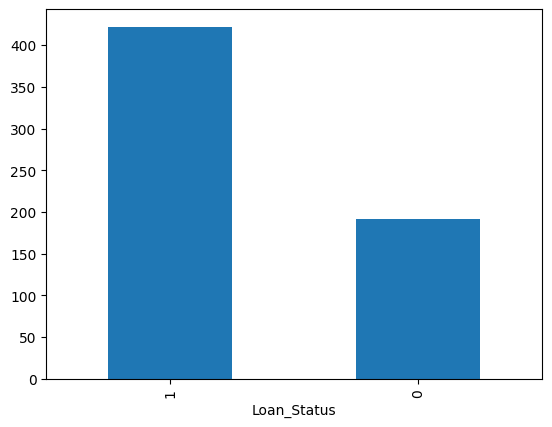

In [36]:
df['Loan_Status'].value_counts().plot.bar()

In [37]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [38]:
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0,0,0,128.0,360.0,1.0,2,1,5849.0
1,1,1,1,0,0,128.0,360.0,1.0,0,0,6091.0
2,1,1,0,0,1,66.0,360.0,1.0,2,1,3000.0
3,1,1,0,1,0,120.0,360.0,1.0,2,1,4941.0
4,1,0,0,0,0,141.0,360.0,1.0,2,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,71.0,360.0,1.0,0,1,2900.0
610,1,1,3,0,0,40.0,180.0,1.0,0,1,4106.0
611,1,1,1,0,0,253.0,360.0,1.0,2,1,8312.0
612,1,1,2,0,0,187.0,360.0,1.0,2,1,7583.0


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.25, random_state=0) 

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

In [41]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression(random_state=0) 
model.fit(X_train,y_train) 
 

LogisticRegression(random_state=0)

In [42]:
y_pred= model.predict(X_test) 
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred) 

In [44]:
cm

array([[ 19,  24],
       [  2, 109]], dtype=int64)

In [45]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test,y_pred) 

0.8311688311688312

In [53]:
from sklearn.metrics import precision_score


In [55]:
precision=precision_score(y_test,y_pred)
precision

0.8195488721804511

In [57]:
from sklearn.metrics import recall_score

In [59]:
recall=recall_score(y_test,y_pred)
recall

0.9819819819819819

In [60]:
from sklearn.metrics import f1_score

In [62]:
f1=f1_score(y_test,y_pred)
f1

0.8934426229508197

In [71]:
from sklearn.metrics import cohen_kappa_score

In [72]:
cohen=cohen_kappa_score(y_pred,y_test)
cohen

0.5026086956521738

In [66]:
from sklearn.metrics import roc_curve,roc_auc_score

In [68]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
auc_score

0.7119212235491306

In [69]:
from sklearn.metrics import precision_recall_curve

In [74]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
for i in range(len(precision)):
     print(f"Precision: {precision[i]:.3f}, Recall: {recall[i]:.3f}")

Precision: 0.721, Recall: 1.000
Precision: 0.820, Recall: 0.982
Precision: 1.000, Recall: 0.000


In [46]:
pred_data = pd.DataFrame([['2','1','3','1','0','29900000','12','778','50700000','9600000']],columns=['Gender','Married','Dependents','Education','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Total_Income']) 

In [47]:
pred_data

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,2,1,3,1,0,29900000,12,778,50700000,9600000


In [48]:
pred_data = scaler.transform(pred_data) 

In [49]:
model.predict(pred_data) 

array([1])

In [50]:
import pickle as pk

In [51]:
pk.dump(model,open('model.pkl','wb')) 

In [52]:
pk.dump(scaler,open("scaler.pkl",'wb')) 